In [0]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split
import os, re, glob
import cv2
import random
import matplotlib.pyplot as plt
from keras.metrics import categorical_accuracy
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, regularizers
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.applications import VGG16, ResNet50
from keras import Input
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
!ls "/gdrive/My Drive"

 결혼식				      ebiz1609.pdf
 일본여행			      양식-제목없음.gform
'제목없는 폴더'			      gpt-2-playground_.ipynb
 000002.jpg			     '제목 없는 스프레드시트.gsheet'
 00.Perceptron_iris.ipynb	     '국가장학금에 대한 만족도 조사.gsheet'
'제목없는 폴더 (1)'		      model.h5
'제목 없는 스프레드시트 (1).gsheet'   model.json
 burbach2018user.pdf		      test.csv
'Colab Notebooks'		      test_model.csv
 cosmetic_image			      train.csv
 cosmetic_image2		     'Untitled1.ipynb의 사본'
 drive


In [0]:
size_x = 250
size_y = 250

img_rows250, img_cols250 = size_x, size_y

path = "/gdrive/My Drive/cosmetic_image/" # 경로 추적

categories = os.listdir(path) # data 폴더 안에 있는 폴더 명
ncategories = len(categories)
print(categories)

imgs = []
labels = []
num = 0
# LOAD ALL IMAGES 
for i, category in enumerate(categories):
    print(i) 
    for f in os.listdir(path  + category):
        try:
            fullpath = os.path.join(path + category, f)
            img = cv2.imread(fullpath)
#             img = img[15:235,15:235,:]
            imgs.append(img) 
            label_curr = i
            labels.append(label_curr)
#             print(img.shape)
#             print(labels.shape)
      
        except:
            continue
# print(len(imgs))

['drjart ceramidin liquid 250x250', 'bobbibrown extra face oil 250x250', 'chanel hydra serum 250x250', 'chanel blue serum 250x250', 'chanel beaute initiale 250x250', 'drjart ctrl-a soothing moisturizer 250x250', 'bobbibrown extra repair moisture cream 250x250', 'chanel le lift eye cream 250x250', 'drjart ceramidin cream 250x250', 'chanel hydra beauty micro bubble cream 250x250', 'drjart second generation cicapair cream 250x250', 'esteelauder revitalizing supreme+ global antiaging power cream 250x250', 'esteelauder six generation advanced night repair essence 250x250', 'esteelauder idealist pore minimizing skin refinisher 250x250', 'esteelauder micro essence skin activating treatment lotion 250x250', 'esteelauder hydrationist moisture cream 250x250', 'drjart dermaclear micro foam 250x250', 'etudehouse baking powder pore cleansing foam 250x250', 'drjart vital hydra solution biome 250x250', 'esteelauder crescent white full cycle brightening UV protector SPF 50 PA++++ 250x250', 'etudehouse

In [0]:
imgs=np.array(imgs)
imgs = np.array(imgs).astype('float32')
imgs /= 255.
imgs = imgs.reshape(imgs.shape[0],img_rows250, img_cols250,3)
                
print ("Num imgs: %d" % (len(imgs)))
print ("Num labels: %d" % (len(labels)))
print (ncategories)

Num imgs: 3051
Num labels: 3051
33


In [0]:
out_220 = imgs[:,15:235,15:235,:]
# print(out.shape)
img1 = imgs[:,:220,:220,:]
img2 = imgs[:,:220,30:250,:]
img3 = imgs[:,30:250,:220,:]
img4 = imgs[:,30:250,30:250,:]
list = [img1,img2,img3,img4]
for i in list:
    print(i.shape)
    out_220 = np.concatenate((out_220,i),axis=0)


(3051, 220, 220, 3)
(3051, 220, 220, 3)
(3051, 220, 220, 3)
(3051, 220, 220, 3)


In [0]:
#augmentation
def rot_augment(img):
    img90 = np.rot90(img,k=1,axes=(1,2))
    img180 = np.rot90(img,k=2,axes=(1,2))
    img270 = np.rot90(img,k=3,axes=(1,2))
    
    num = random.randint(1, 3)
    if num == 1:
        return np.concatenate((img, img90), axis=0)
    if num == 2:
        return np.concatenate((img, img180), axis=0)
    if num == 3:
        return np.concatenate((img, img270), axis=0)

def flip_augment(img):
    fl=img[:,:,::-1,:]
    return np.concatenate((img,fl),axis=0)
  
def augment(img):
    return flip_augment(img)
    
def y_augment(y,n):
    out = y;
    for i in range(n-1):
        out = np.concatenate((out,y),axis=0)
    return out

In [0]:
pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(220, 220, 3))

W0827 06:31:48.091708 140248099084160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 06:31:48.153512 140248099084160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 06:31:48.176061 140248099084160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 06:31:48.234569 140248099084160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 06:31:48.842961 140248099084160 deprecation_wrapp

In [0]:
x_data = out_220
y_data = pd.DataFrame(labels*5)
pre_trained_vgg.trainable = False
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)


model = Sequential()
model.add(pre_trained_vgg)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(33,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=70, verbose=1, validation_split=0.2)


W0827 06:31:56.815321 140248099084160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 06:31:56.951293 140248099084160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 9763 samples, validate on 2441 samples
Epoch 1/70
9763/9763 [==============================] - 117s 12ms/step - loss: 1.4141 - acc: 0.6461 - val_loss: 0.5044 - val_acc: 0.8882
Epoch 2/70
9763/9763 [==============================] - 104s 11ms/step - loss: 0.2722 - acc: 0.9483 - val_loss: 0.2741 - val_acc: 0.9385
Epoch 3/70
9763/9763 [==============================] - 104s 11ms/step - loss: 0.1014 - acc: 0.9878 - val_loss: 0.1736 - val_acc: 0.9631
Epoch 4/70
9763/9763 [==============================] - 104s 11ms/step - loss: 0.0512 - acc: 0.9961 - val_loss: 0.1325 - val_acc: 0.9717
Epoch 5/70
9763/9763 [==============================] - 104s 11ms/step - loss: 0.0296 - acc: 0.9978 - val_loss: 0.1209 - val_acc: 0.9713
Epoch 6/70
9763/9763 [==============================] - 104s 11ms/step - loss: 0.0200 - acc: 0.9988 - val_loss: 0.1031 - val_acc: 0.9746
Epoch 7/70
9763/9763 [==============================] - 104s 11ms/step - loss: 0.0153 - acc: 0.9990 - val_loss: 0.0895 - val_acc: 

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
score[1]

0.9790232710586693

In [0]:
model_json = model.to_json()
with open("/gdrive/My Drive/model.json", "w") as json_file : 
    json_file.write(model_json)

In [0]:
model.save_weights("/gdrive/My Drive/model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
sss="/gdrive/My Drive/000002.jpg"


In [0]:
size=220,220
new_img = Image.new("RGB", (220,220), "black") 
im = Image.open(sss) 
im.thumbnail(size, Image.ANTIALIAS) 
load_img = im.load() 
load_newimg = new_img.load() 
i_offset = (220 - im.size[0]) / 2 
j_offset = (220 - im.size[1]) / 2 
for i in range(0, im.size[0]): 
  for j in range(0, im.size[1]): 
    load_newimg[i + i_offset,j + j_offset] = load_img[i,j] 
ssss=img_to_array(new_img)
ssss=ssss.reshape(-1,ssss.shape[0],ssss.shape[1],ssss.shape[2])
ssss/=255.
pred=model.predict(ssss,verbose=2)

In [0]:
pred

array([[3.01347506e-19, 3.68686484e-20, 2.69764112e-16, 1.07139199e-14,
        1.29374098e-11, 5.44816824e-20, 3.86886393e-18, 4.90637926e-26,
        1.30218769e-15, 1.07904014e-24, 2.53559892e-18, 5.46986428e-21,
        4.73474830e-21, 1.49838890e-26, 8.99049552e-13, 2.32663815e-24,
        1.20733253e-19, 1.32320757e-17, 1.11371397e-15, 1.12322105e-13,
        4.70464757e-20, 7.95923182e-24, 3.04818851e-23, 1.39363615e-16,
        6.52122829e-19, 1.00000000e+00, 3.97914056e-14, 2.90890066e-16,
        2.04745335e-11, 1.55531776e-17, 5.72595182e-18, 8.75093175e-20,
        2.26290039e-21]], dtype=float32)

In [0]:
pred_class=model.predict_classes(ssss,verbose=2)

In [0]:
pred_class

array([25])

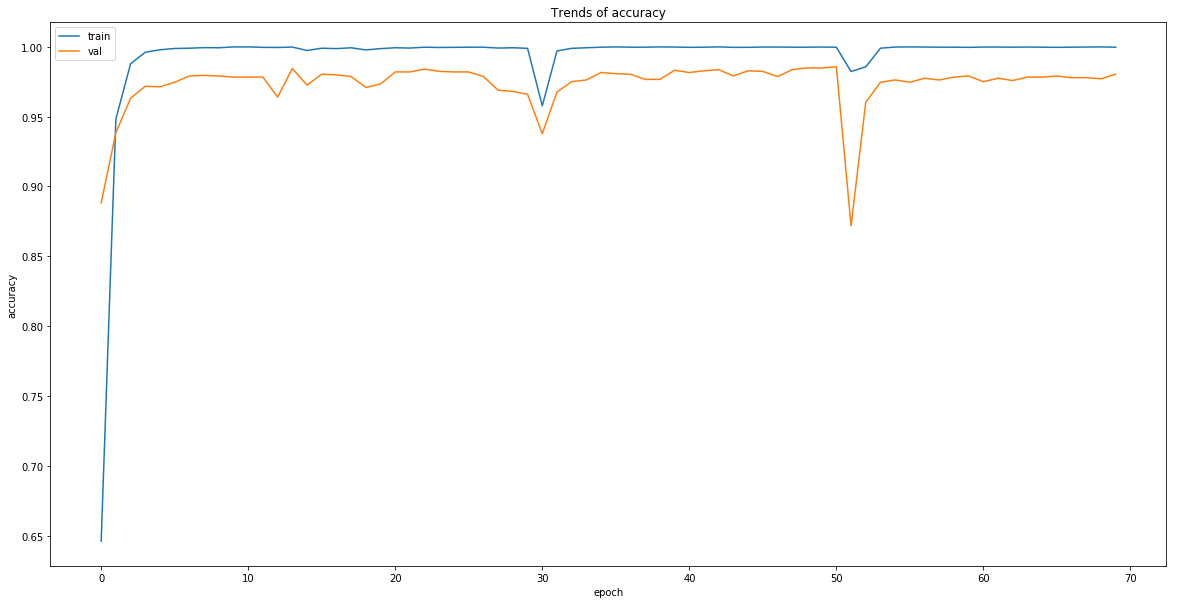

In [0]:
plt.figure(figsize=(20, 10))


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Trends of accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')


plt.show()